# Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [19]:
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Checking Null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Checking Duplicates

In [18]:
if df.duplicated().sum() > 0:
    print("Duplicates are present")
else:
    print("No duplicates found")

No duplicates found


---

# Customer Segmentation

## Types of Customers

In [21]:
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


## Number of Customers in Each Segment

In [23]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers.columns = ['Segment', 'Number of Customers']
print(number_of_customers)

       Segment  Number of Customers
0     Consumer                 5191
1    Corporate                 3020
2  Home Office                 1783


## Visualizing the Number of Customers in Each Segment

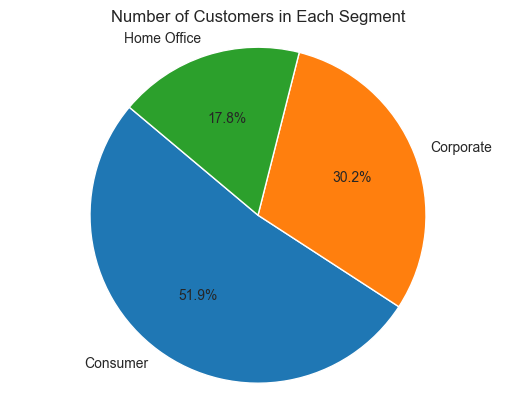

In [27]:
pie_chart = plt.pie(number_of_customers['Number of Customers'], labels = number_of_customers['Segment'], autopct = '%1.1f%%', startangle = 140)
pie_chart = plt.axis('equal')
pie_chart = plt.title('Number of Customers in Each Segment')
pie_chart = plt.show()

## Sales per Each customer segment

In [28]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment.columns = ['Segment', 'Total Sales']
print(sales_per_segment)

       Segment   Total Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05


## Visualizing Sales per Each customer segment

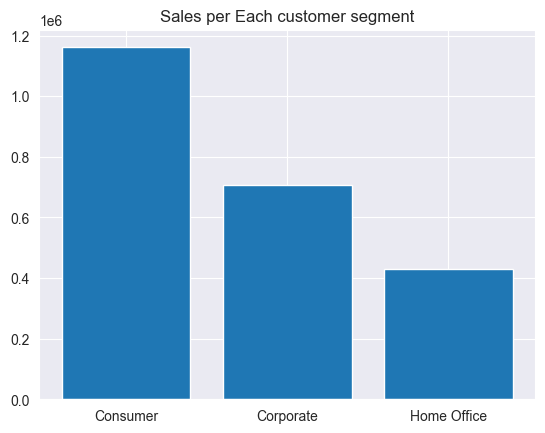

In [29]:
sales_per_segment_chart = plt.bar(sales_per_segment['Segment'], sales_per_segment['Total Sales'])
sales_per_segment_chart = plt.title('Sales per Each customer segment')
sales_per_segment_chart = plt.show()

---